In [2]:
!pip install face_recognition
!pip install gast --upgrade
!pip install tensorflow==1.15.0
!pip install imageai --upgrade
!pip install keras
!pip install gast --upgrade

import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import drive
import numpy as np
import urllib.request
import os
import cv2
from PIL import Image, ImageDraw
import face_recognition


path = ""

     |████████████████████████████████| 100.2MB 110kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=69d859db7cd175e35d304a19fa1f02c91aba4278e69bd9fe96ac82f9f243756c
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
Requirement already up-to-date: gast in /usr/local/lib/python3.6/dist-packages (0.3.3)
     |████████████████████████████████| 412.3MB 42kB/s 
     |████████████████████████████████| 512kB 49.6MB/s 
     |████████████████████████████████| 3.8MB 55.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=25af7c6b00796afa64abc98e780ea1639f8e5bf5b1873ecaa03335290a7b443e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but

I found 3 face(s) in this photograph.


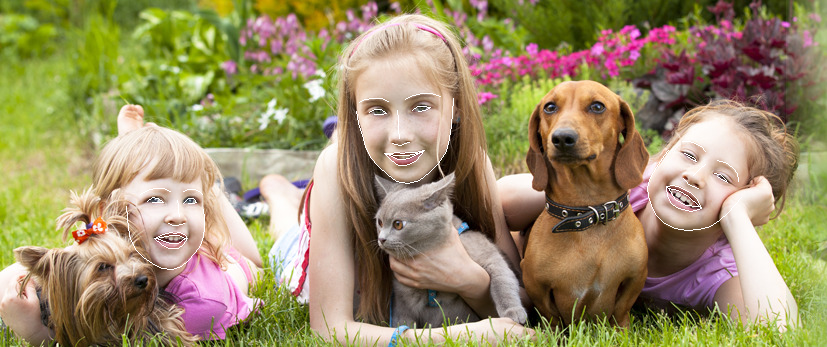

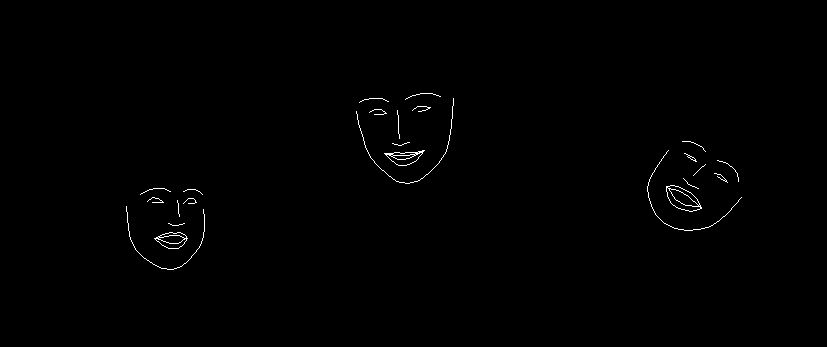

In [17]:

filename = "test2"
ext = ".jpg"


#######################################################################################################################

# Load the jpg file into a numpy array
image = face_recognition.load_image_file(path+filename+ext)
# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

h,w = image.shape[:2]
mask = np.zeros((h,w,3),np.uint8)
mask[:]=(0)

new_img = Image.fromarray(mask)
p = ImageDraw.Draw(new_img)

for face_landmarks in face_landmarks_list:

  """
    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))
        for coord in (face_landmarks[facial_feature]):
          x,y = coords
          plt.plot(x,y,'w.')
  """
    # Let's trace out each facial feature in the image with a line!
  for facial_feature in face_landmarks.keys():
      d.line(face_landmarks[facial_feature], width=1)
      p.line(face_landmarks[facial_feature], width=1)



display(pil_image)
display(new_img)


In [0]:
def gaussian_kernel(size, sigma=1):
  size = int(size) // 2
  x,y = np.mgrid[-size:size+1, -size:size+1]
  normal = 1 / (2.0 * np.pi * sigma**2)
  g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
  return g

def detect_edges(image, t1, t2, kerneltype = 0):
  if kerneltype == 0 : ker = np.ones((5,5),np.uint8)
  elif kerneltype ==1 : ker = gaussian_kernel(5)
  else : return null
  out = cv2.erode(image, ker, iterations = 1)
  out = cv2.dilate(out, ker, iterations = 1)
  out = cv2.Canny(out, t1,t2)
  return out

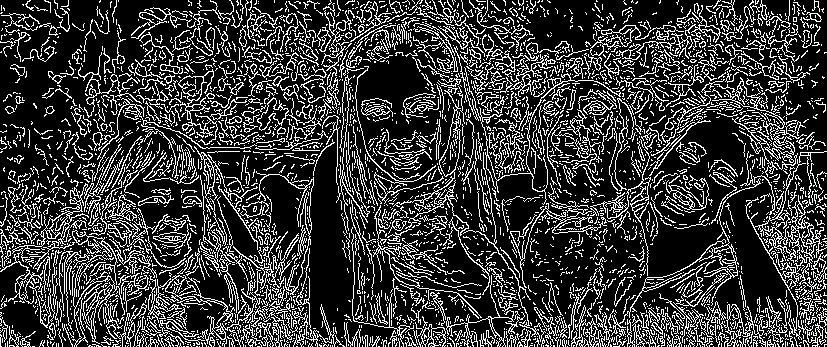

In [5]:
img = cv2.imread(path+filename+ext)
edges = cv2.Canny(img, 80, 100 )
output = Image.fromarray(edges)

display(output)

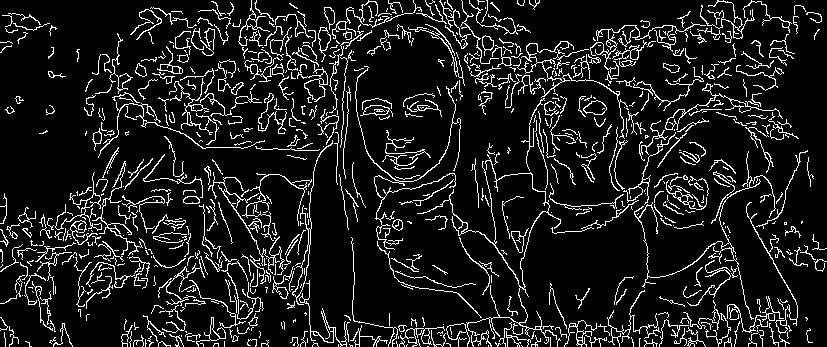

In [6]:
img = cv2.imread(path+filename+ext)

#ker = gaussian_kernel(5)
ker = np.ones((5,5),np.uint8)

erosion = cv2.erode(img, ker, iterations = 1)
dilation = cv2.dilate(erosion, ker, iterations = 1)
edges = cv2.Canny(dilation, 100,200)

output = Image.fromarray(edges)
display(output)

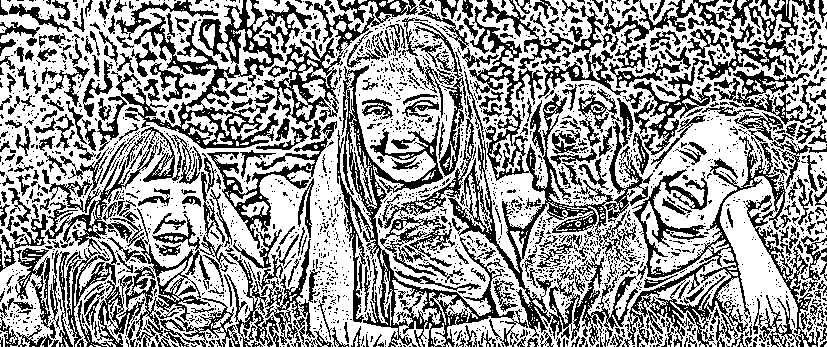

In [7]:
img = cv2.imread(path+filename+ext,0)
#img = Image.fromarray( cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

out = Image.fromarray(th)
display(out)

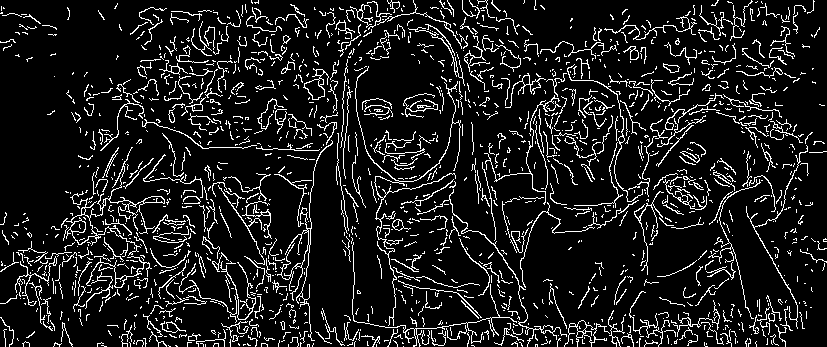

In [8]:
img = cv2.imread(path+filename+ext,0)

out = detect_edges(img,80,100)

out = Image.fromarray(out)
display(out)

In [9]:
filename = "test2"

from imageai.Detection import ObjectDetection
import tensorflow as tf

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( path+"resnet50_coco_best_v2.0.1.h5" )
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image= path+filename+ext, output_image_path= path+filename+"_det"+ext)

for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )



Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

dog  :  78.0058741569519
person  :  73.56655597686768
dog  :  88.08653950691223
cat  :  81.68187141418457
person  :  78.40880155563354
person  :  67.63315200805664


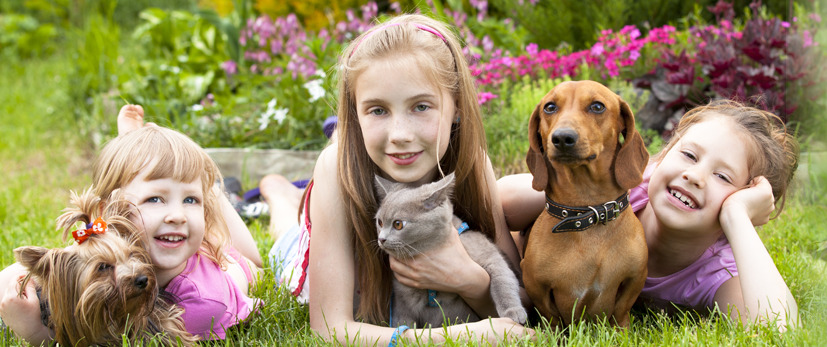

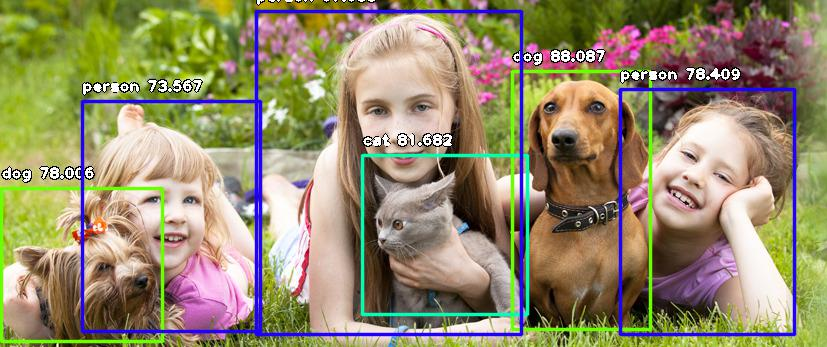

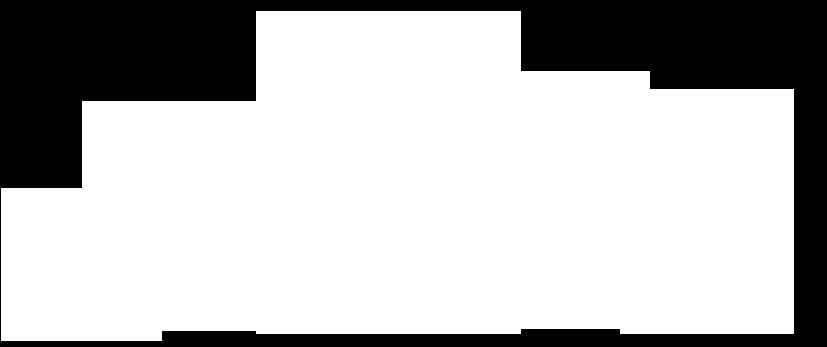

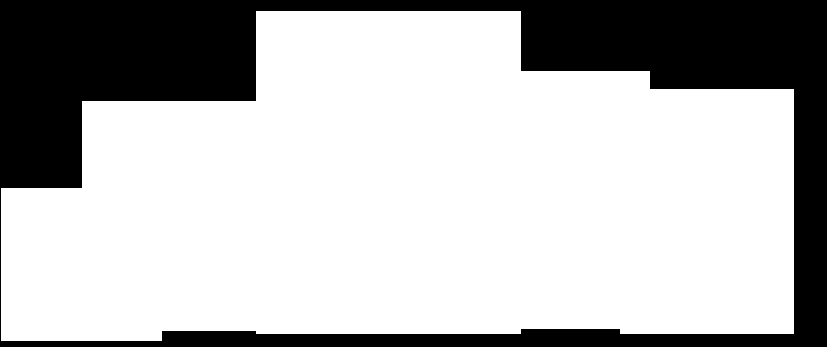

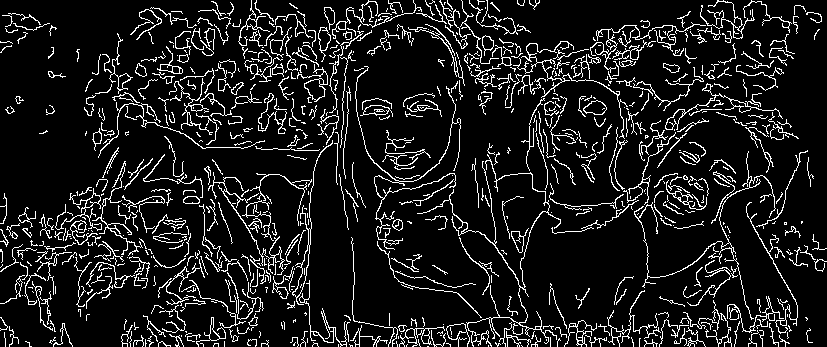

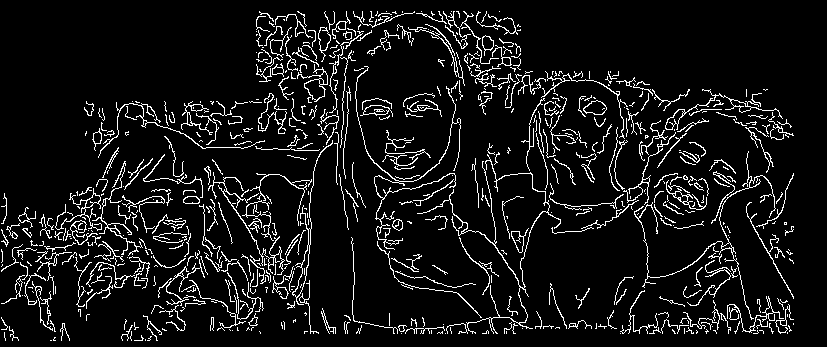

In [10]:
src = cv2.imread(path+filename+ext)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)


img_det = cv2.imread(path+filename+"_det"+ext)
img_det = cv2.cvtColor(img_det, cv2.COLOR_BGR2RGB)


display(Image.fromarray(src))
display(Image.fromarray(img_det))

h,w = img_det.shape[:2]
mask = np.zeros((h,w,3),np.uint8)
mask[:]=(0)

for obj in detections:
  coord = obj['box_points']
  bh = abs(coord[1] - coord[3])
  bw = abs(coord[0] - coord[2])
  box = 255*np.ones((bh,bw,3),np.uint8)

  mask[coord[1]:coord[3], coord[0]:coord[2]] = box[:,:]

mask2 = Image.fromarray(mask)
display( mask2 )

mask2 = mask2.convert('RGBA')
data = mask2.getdata()
ndata = []
for d in data:
  if d[0]==255 and d[1]==255 and d[2]==255:
    ndata.append((255,255,255,0))
  else:
    ndata.append(d)

mask2.putdata(ndata)
display( mask2 )

filtered = detect_edges( src, 100, 200 )
filtered = Image.fromarray(filtered)
display(filtered)

filtered.paste( mask2, (0,0), mask2)
display(filtered)